<a href="https://colab.research.google.com/github/tylee33/Vision_Lecture/blob/main/%5B4%ED%9A%8C%5DObject_Detection(YOLO3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 물체 탐지(Object detection)


# YOLO3로 물체 탐지

## YOLOv3 다운로드


In [ ]:
# 프로젝트 다운로드
%cd /content
!rm -rf darknet
!git clone https://github.com/pjreddie/darknet


/content
Cloning into 'darknet'...
remote: Enumerating objects: 5955, done.
remote: Total 5955 (delta 0), reused 0 (delta 0), pack-reused 5955
Receiving objects: 100% (5955/5955), 6.37 MiB | 6.28 MiB/s, done.
Resolving deltas: 100% (3932/3932), done.


In [ ]:
# 빌드
%cd /content/darknet
!make

# 빌드된 실행파일 확인
!ls -al darknet

# 빌드 확인
!./darknet

/content/darknet
mkdir -p obj
mkdir -p backup
mkdir -p results
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/gemm.c -o obj/gemm.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/utils.c -o obj/utils.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/cuda.c -o obj/cuda.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/deconvolutional_layer.c -o obj/deconvolutional_layer.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/convolutional_layer.c -o obj/convolutional_layer.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/list.c -o obj/list.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/image.c -o

## 학습된 모델 파일 다운로드

In [ ]:
%cd /content/darknet
!wget wget https://pjreddie.com/media/files/yolov3.weights

/content/darknet
--2022-09-17 06:26:13--  http://wget/
Resolving wget (wget)... failed: Name or service not known.
wget: unable to resolve host address ‘wget’
--2022-09-17 06:26:13--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  17.9MB/s    in 14s     

2022-09-17 06:26:29 (16.4 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]

FINISHED --2022-09-17 06:26:29--
Total wall clock time: 15s
Downloaded: 1 files, 237M in 14s (16.4 MB/s)


## darknet으로 물체 탐지 실행

/content/darknet
layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8      

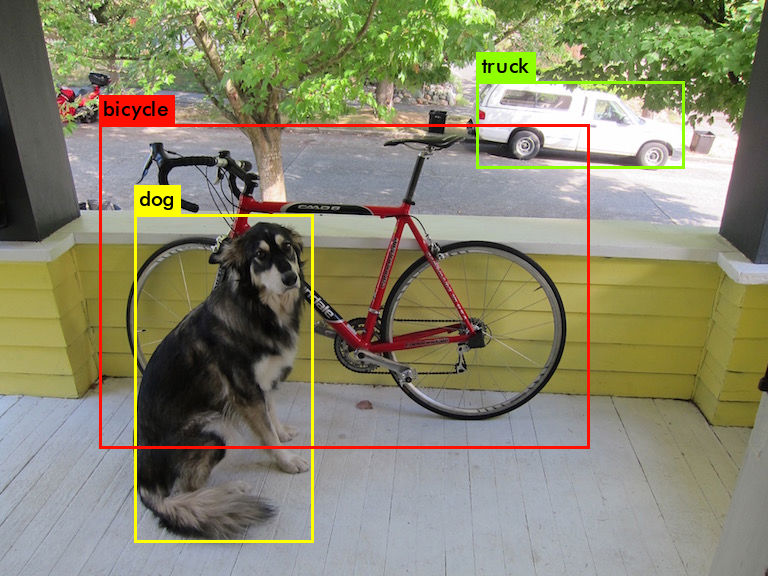

In [ ]:
%cd /content/darknet
!./darknet detect cfg/yolov3.cfg yolov3.weights data/dog.jpg

from IPython.display import Image
Image('predictions.jpg')

# Python Keras로 물체 YOLO 탐지 실행

## Keras 변환 코드 다운로드


In [ ]:
# 다운로드
%cd /content
!rm -rf keras-yolo3

!git clone https://github.com/qqwweee/keras-yolo3
  
# 다운로드된 디렉토리로 이동
%cd keras-yolo3

# 내용 확인
!pwd
!ls -al  

/content
Cloning into 'keras-yolo3'...
remote: Enumerating objects: 144, done.
remote: Total 144 (delta 0), reused 0 (delta 0), pack-reused 144
Receiving objects: 100% (144/144), 151.08 KiB | 21.58 MiB/s, done.
Resolving deltas: 100% (65/65), done.
/content/keras-yolo3
/content/keras-yolo3
total 124
drwxr-xr-x 6 root root  4096 Sep 17 06:26 .
drwxr-xr-x 1 root root  4096 Sep 17 06:26 ..
-rw-r--r-- 1 root root  1323 Sep 17 06:26 coco_annotation.py
-rw-r--r-- 1 root root 10093 Sep 17 06:26 convert.py
-rw-r--r-- 1 root root  5707 Sep 17 06:26 darknet53.cfg
drwxr-xr-x 2 root root  4096 Sep 17 06:26 font
drwxr-xr-x 8 root root  4096 Sep 17 06:26 .git
-rw-r--r-- 1 root root  1201 Sep 17 06:26 .gitignore
-rw-r--r-- 1 root root  3482 Sep 17 06:26 kmeans.py
-rw-r--r-- 1 root root  1064 Sep 17 06:26 LICENSE
drwxr-xr-x 2 root root  4096 Sep 17 06:26 model_data
-rw-r--r-- 1 root root  4077 Sep 17 06:26 README.md
-rw-r--r-- 1 root root 10686 Sep 17 06:26 train_bottleneck.py
-rw-r--r-- 1 root root  

## YOLO3 모델 파일 카피


In [ ]:
%cd /content/keras-yolo3

!cp /content/darknet/yolov3.weights ./

!ls -al yolov3.weights

/content/keras-yolo3
-rw-r--r-- 1 root root 248007048 Sep 17 06:26 yolov3.weights


## 모델 파일 변환

YOLO3 자체는 C/C++로 구현된 DarkNet 프레임웤으로 구현되어 있다. 

공개된 모델은 DarkNet의 포멧이다. 이를 Keras에서 사용할 수 있는 h5 포멧으로 변환한다.


- convert.py : 변환 실행 파일

- yolov3.cfg : Darknet에서 사용하는 모델 구조 정의 파일

- yolov3.weight : Darknet으로 학습된 모델 파일


실행 결과로 다음의 h5 파일로 변환된다.
 
- model/yolov3.h5 : 변환된 모델 파일


In [ ]:
!head -40 yolov3.cfg 

[net]
# Testing
batch=1
subdivisions=1
# Training
# batch=64
# subdivisions=16
width=416
height=416
channels=3
momentum=0.9
decay=0.0005
angle=0
saturation = 1.5
exposure = 1.5
hue=.1

learning_rate=0.001
burn_in=1000
max_batches = 500200
policy=steps
steps=400000,450000
scales=.1,.1

[convolutional]
batch_normalize=1
filters=32
size=3
stride=1
pad=1
activation=leaky

# Downsample

[convolutional]
batch_normalize=1
filters=64
size=3
stride=2
pad=1


In [ ]:
# 실행하기전 기존것이 있다면 삭제
!rm -rf yolov3.h5

# 실행 
%run convert.py yolov3.cfg yolov3.weights yolov3.h5

# Error 발생 시 하기 내역 수정
# /content/keras-yolo3/convert.py
# from tensorflow.keras.layers import BatchNormalization

Loading weights.
Weights Header:  0 2 0 [32013312]
Parsing Darknet config.
Creating Keras model.
Parsing section net_0
Parsing section convolutional_0
conv2d bn leaky (3, 3, 3, 32)
Parsing section convolutional_1
conv2d bn leaky (3, 3, 32, 64)
Parsing section convolutional_2
conv2d bn leaky (1, 1, 64, 32)
Parsing section convolutional_3
conv2d bn leaky (3, 3, 32, 64)
Parsing section shortcut_0
Parsing section convolutional_4
conv2d bn leaky (3, 3, 64, 128)
Parsing section convolutional_5
conv2d bn leaky (1, 1, 128, 64)
Parsing section convolutional_6
conv2d bn leaky (3, 3, 64, 128)
Parsing section shortcut_1
Parsing section convolutional_7
conv2d bn leaky (1, 1, 128, 64)
Parsing section convolutional_8
conv2d bn leaky (3, 3, 64, 128)
Parsing section shortcut_2
Parsing section convolutional_9
conv2d bn leaky (3, 3, 128, 256)
Parsing section convolutional_10
conv2d bn leaky (1, 1, 256, 128)
Parsing section convolutional_11
conv2d bn leaky (3, 3, 128, 256)
Parsing section shortcut_3
Parsi

None
Saved Keras model to yolov3.h5
Read 62001757 of 62001757.0 from Darknet weights.


## 모델구조 보기

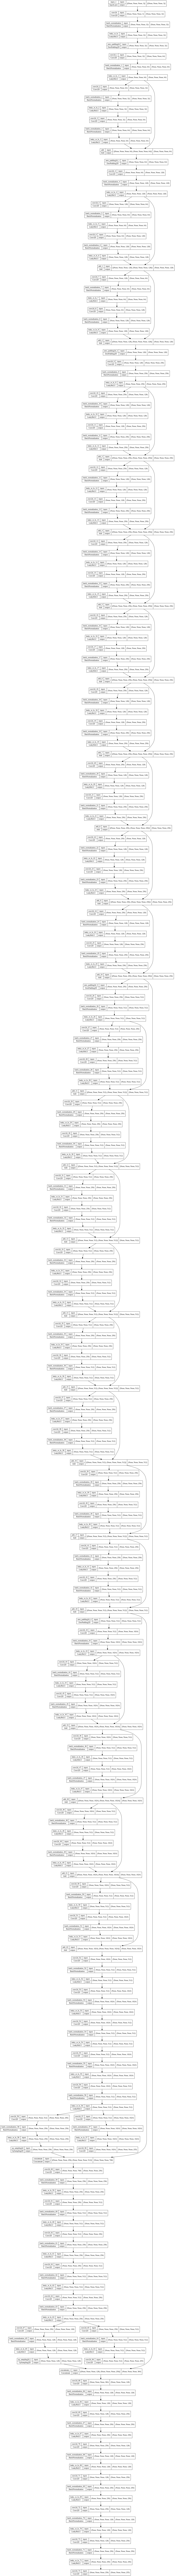

In [ ]:
from keras.models import load_model
from keras.utils.vis_utils import plot_model

# 모델 파일 로딩
model = load_model('yolov3.h5')

# 구조를 이미지로 저장
plot_model(model, show_shapes=True, to_file='yolo3_structure.png')

from IPython.display import Image
Image('yolo3_structure.png')



## 탐지 대상 이미지 다운로드


In [ ]:
!wget -O street_view.jpg http://beltlineorg-wpengine.netdna-ssl.com/wp-content/uploads/2012/12/IMG_5669-flickr-websized.jpg

from IPython.display import Image, display
display(Image(filename='street_view.jpg')) 

## 물체 탐지 실행

다음의 파일이 필요하다.
- yolov3.h5 : 모델 파일
- model_data/coco_classes.txt : 클래스 이름


In [ ]:
!cat model_data/coco_classes.txt

In [ ]:
from IPython.display import display 
from PIL import Image
from yolo import YOLO

def do_object_detection(file, model_path, class_path):
  
  yolo = YOLO(model_path=model_path, classes_path=class_path)

  # 이미지 로딩
  image = Image.open(file)

  # 실행
  result_image = yolo.detect_image(image)

  # 실행 결과 표시
  display(result_image)

# Error 발생 시 하기 내역 수정
# /content/keras-yolo3/yolo3/model.py
# from tensorflow.keras.layers import BatchNormalization

# /content/keras-yolo3/yolo.py
# from tensorflow.python.keras.utils.multi_gpu_utils import multi_gpu_model

In [ ]:
from tensorflow.python.framework.ops import disable_eager_execution
disable_eager_execution()

do_object_detection('street_view.jpg', 'yolov3.h5', 'model_data/coco_classes.txt')

# Error 발생 시 하기 내역 수정
# https://stackoverflow.com/questions/57558476/training-a-keras-model-yields-multiple-optimizer-errors
# yolo3/model.py (140,141)
# box_xy = (K.sigmoid(feats[..., :2]) + grid) / K.cast(grid_shape[::-1], K.dtype(feats))
# box_wh = K.exp(feats[..., 2:4]) * anchors_tensor / K.cast(input_shape[::-1], K.dtype(feats))
# 아래와 같이 수정
# box_xy = (K.sigmoid(feats[..., :2]) + grid) / K.cast(grid_shape[...,::-1], K.dtype(feats))
# box_wh = K.exp(feats[..., 2:4]) * anchors_tensor / K.cast(input_shape[...,::-1], K.dtype(feats))

# https://github.com/tensorflow/tensorflow/issues/47311#issuecomment-786116401